In [2]:
# %matplotlib inline
# from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as sa
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.sql import label

In [3]:
plt.style.use('fivethirtyeight')

# Reflect Tables into SQLAlchemy ORM

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# engine, suppose it has two tables 'user' and 'address' set up
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect the tables
Base.prepare(engine, reflect=True)

Base.classes.keys()
#tables




['measurement', 'station']

In [5]:
df_station = pd.read_sql_table("station", con=engine)
df_measurement = pd.read_sql_table("measurement", con=engine)

# reflect the tables
df_station
df_measurement

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [6]:
# We can view all of the classes that automap found


In [7]:
# Save references to each table
Measurement = Base.classes['measurement']
Station = Base.classes['station']
dir(Measurement)
type(Measurement)

sqlalchemy.ext.declarative.api.DeclarativeMeta

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
# dir(Measurement)
#  'date',
#  'id',
#  'metadata',
#  'prcp',
#  'prepare',
#  'station',
#  'tobs'
# dir(Station)
#  'elevation',
#  'id',
#  'latitude',
#  'longitude',
#  'metadata',
#  'name',
#  'prepare',
#  'station'
inspector = inspect(engine)

In [9]:
def describe_table(table_name, engine):
    print(f'\nTable:  {table_name}')
    insp = inspect(engine)
    [print(c['name'], c['type']) for c in insp.get_columns(table_name)]

In [10]:
describe_table('measurement', engine)
describe_table('station', engine)


Table:  measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

Table:  station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [39]:
start = '2014-01-04'
j = session.query(
    Station.name, 
    label('min_temp', func.min(Measurement.tobs)),
    label('avg_temp', func.avg(Measurement.tobs)),
    label('max_temp', func.max(Measurement.tobs)),
    label('row_count', func.count(Measurement.tobs))
).group_by(Station.name).filter(Station.station == Measurement.station, 
                                Measurement.date >= f'{start}',
                                Measurement.date <= '2014-01-10')
dfj = pd.DataFrame(j)
dfj

,name,min_temp,avg_temp,max_temp,row_count
0,"HONOLULU OBSERVATORY 702.2, HI US",60.0,62.571429,65.0,7
1,"KANEOHE 838.1, HI US",66.0,69.428571,72.0,7
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",70.0,72.000000,74.0,6
3,"MANOA LYON ARBO 785.2, HI US",66.0,68.428571,70.0,7
4,"PEARL CITY, HI US",63.0,65.000000,68.0,4
5,"UPPER WAHIAWA 874.3, HI US",65.0,67.666667,71.0,3
6,"WAIHEE 837.5, HI US",61.0,65.428571,69.0,7
7,"WAIKIKI 717.2, HI US",65.0,69.428571,72.0,7
8,"WAIMANALO EXPERIMENTAL FARM, HI US",68.0,70.142857,72.0,7


In [ ]:
j2 = session.query(
    Station.name, 
    label('min_temp', func.min(Measurement.tobs)),
    label('avg_temp', func.avg(Measurement.tobs)),
    label('max_temp', func.max(Measurement.tobs)),
    label('row_count', func.count(Measurement.tobs))
).join()

## Exploratory Climate Analysis

### Select my vacation destination and dates

In [98]:
# Table:  station
# id INTEGER
# station TEXT
# name TEXT
# latitude FLOAT
# longitude FLOAT
# elevation FLOAT

# Review the stations.  Since I'm going to "HI US", I'd like to stay at the highest location
q = session.query(Station.name, Station.station)
_ = [print(n) for n in q]
(dest_name, dest_station) = session.query(Station.name, Station.station).filter(Station.station == 'USC00513117').first()
#print(f'I have never been to Kaneohe, so I will choose to go there, with station code {})
#print(f'I will vacation at {q.name}, at {q.elevation}, with station code {q.station}.')
#_ = [print(n) for n in q]
# q2 = session.execute('select * from station')
# _ = [print(n) for n in q2]

('WAIKIKI 717.2, HI US', 'USC00519397')
('KANEOHE 838.1, HI US', 'USC00513117')
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830')
('PEARL CITY, HI US', 'USC00517948')
('UPPER WAHIAWA 874.3, HI US', 'USC00518838')
('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523')
('WAIHEE 837.5, HI US', 'USC00519281')
('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918')
('MANOA LYON ARBO 785.2, HI US', 'USC00516128')


In [117]:
q4a = session.query(Measurement.station).distinct().all()
type(q4a[0])
print(q4a[0])
help(q4a[0])
#_ = [print(n) for n in q4a]

('USC00519397',)
Help on result in module sqlalchemy.util._collections object:

class result(_LW)
 |  result(vals)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Method resolution order:
 |      result
 |      _LW
 |      AbstractKeyedTuple
 |      builtins.tuple
 |      builtins.object
 |  
 |  Data descriptors defined here:
 |  
 |  station
 |      itemgetter(item, ...) --> itemgetter object
 |      
 |      Return a callable object that fetches the given item(s) from its operand.
 |      After f = itemgetter(2), the call f(r) returns r[2].
 |      After g = itemgetter(2, 5, 3), the call g(r) returns (r[2], r[5], r[3])
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  _fields = ('s

In [99]:
# How is the measurement table related to the station table?
# Table:  measurement
# id INTEGER
# station TEXT
# date TEXT
# prcp FLOAT
# tobs FLOAT

# q3 = session.query(Measurement.id).distinct()
# _ = [print(n) for n in q3]
# The id column in the measurement table appears to be an measurement id, not a station id

q4 = session.query(Measurement.station).distinct()
_ = [print(n) for n in q4]
# measurement.station = station.station

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [100]:
# Pick the dates for my vacation to UPPER WAHIAWA
# q5 = session.query(func.min(Measurement.date), func.max(Measurement.date))
# ss = [n for n in q5]
# _ = [print(n) for n in q5]
# ss
# q5.values()
# t1 = q5.first()
# t1
# t2 = q5.values()
# t2
(first_date, last_date) = session.query(func.min(Measurement.date), func.max(Measurement.date))\
    .filter(Measurement.station == dest_station).first()
print (f'The weather measurements span from {first_date} to {last_date}.')

# I will enjoy UPPER WAHIAWA from 2018-03-10 to 2018-03-18,
# to take my wife for her Spring Break and my birthday,
# and to get there before COVID-19.
trip_start = '2018-03-10'
trip_end = '2018-03-18'

The weather measurements span from 2010-01-01 to 2017-07-31.


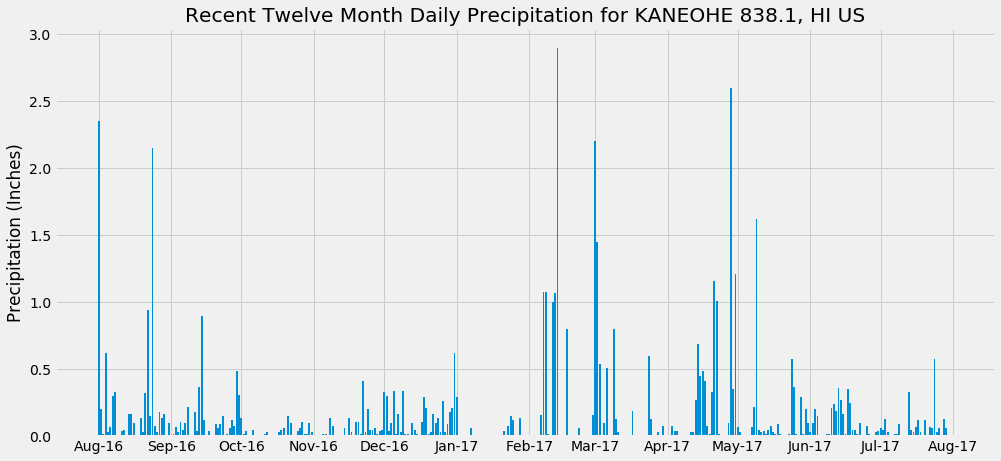

In [101]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
dt_twelve_end = dt.datetime.strptime(last_date, '%Y-%m-%d').date()
dt_twelve_start = dt_twelve_end - dt.timedelta(days=364)
str_twelve_start = dt_twelve_start.strftime('%Y-%m-%d')
#print(str_twelve_start, dt_twelve_start, dt_twelve_end)

# Perform a query to retrieve the data and precipitation scores
q6 = session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.station == dest_station,Measurement.date >= str_twelve_start).order_by(Measurement.date)
#.filter(Measurement.date >= str_twelve_start, Measurement.station == q.station).order_by(Measurement.date)
#    .filter(Measurement.station == q.station)\

#_ = [print(n) for n in q6]

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(q6).set_index('date')
df.index = [pd.Timestamp(d) for d in df.index]
# Check type of prcp column
df.dtypes

# Sort the dataframe by date
df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
#df.plot.bar()

fig1, ax = plt.subplots(figsize=(15,7))
ax.bar(df.index, df.prcp)
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.set_title(f"Recent Twelve Month Daily Precipitation for {dest_name}")
_ = ax.set_ylabel("Precipitation (Inches)")

In [102]:
plt.close(fig1)

In [103]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()


,prcp
count,365.000000
mean,0.149014
std,0.354761
min,0.000000
25%,0.000000
50%,0.030000
75%,0.130000
max,2.900000


In [104]:
# Design a query to show how many stations are available in this dataset?
q7 = session.query(Station.station).count()
q7
q8 = session.query(Measurement.station).distinct().count()
q8

9

In [105]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
q9 = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station).order_by(sa.desc(func.count(Measurement.station)))
#q9
print('Station',' '*4,'Rows')
_ = [print(f'{n[0]}  {n[1]:4d}') for n in q9]

Station      Rows
USC00519281  2772
USC00519397  2724
USC00513117  2709
USC00519523  2669
USC00516128  2612
USC00514830  2202
USC00511918  1979
USC00517948  1372
USC00518838   511


In [106]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station = q9[0][0]
print(f'The most active station is {most_active_station}.')
q10 = session.query(Measurement.station,
                    label('min_temp', func.min(Measurement.tobs)), 
                    label('avg_temp', func.avg(Measurement.tobs)), 
                    label('max_temp', func.max(Measurement.tobs))).filter(Measurement.station == most_active_station)
[print(n) for n in q10]
df_tobs = pd.DataFrame(q10).set_index('station')
print(df_tobs)

The most active station is USC00519281.
('USC00519281', 54.0, 71.66378066378067, 85.0)
             min_temp   avg_temp  max_temp
station                                   
USC00519281      54.0  71.663781      85.0


In [107]:
q11 = session.query(Measurement.station,
                    label('min_temp', func.min(Measurement.tobs)), 
                    label('avg_temp', func.avg(Measurement.tobs)), 
                    label('max_temp', func.max(Measurement.tobs))).group_by(Measurement.station)
q12 = q11.filter(Measurement.station == most_active_station)
pd.DataFrame(q11)
pd.DataFrame(q12)

,station,min_temp,avg_temp,max_temp
0,USC00519281,54.0,71.663781,85.0


In [108]:
def YearBefore(YYYY_MM_DD):
    return str(int(YYYY_MM_DD[0:4])-1) + YYYY_MM_DD[4:10]

2017-08-18 2016-08-18


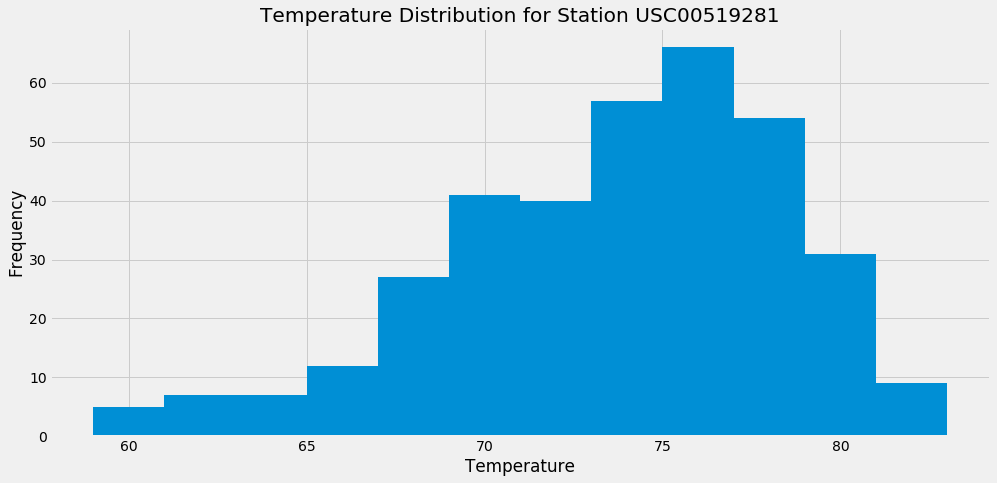

In [109]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station)
d_max = station_tobs.order_by(sa.desc(Measurement.date)).first()[0]
d_yr_ago = YearBefore(d_max)
print(d_max, d_yr_ago)

q13 = station_tobs.filter(Measurement.date > d_yr_ago).order_by(Measurement.date)
df_tobs_yr = pd.DataFrame(q13)
df_tobs_yr.shape

fig2, ax = plt.subplots(figsize=(15,7))
ax.hist(df_tobs_yr.tobs,bins=12)

ax.set_title(f"Temperature Distribution for Station {most_active_station}")
ax.set_xlabel("Temperature")
_ = ax.set_ylabel("Frequency")

## Bonus Challenge Assignment

In [110]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date,Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [111]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps(YearBefore(trip_start),YearBefore(trip_end)))

[(65.0, 71.48214285714286, 82.0)]


In [112]:
q0 = session.query(Measurement.id, Measurement.station, Measurement.date, 
                   label('tobs', func.replace(Measurement.tobs, 'None', '0.0'))
[print(n) for n in q0]

SyntaxError: invalid syntax (<ipython-input-112-fc33def394da>, line 3)

In [ ]:
metadata = sa.MetaData()
Measurement2 = sa.Table('measurement2', Measurement.metadata)

# copy schema and create newTable from oldTable
# for column in Measurement.columns:
#     Measurement2.append_column(column.copy())
# Measurement2.create()
dir(Measurement2)
#type(Measurement2)

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`



In [ ]:
session.close()